In [2]:
import joblib
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [7]:
# Load the Random Forest model from the joblib file
model_path = 'RFRexp5-4-Monster/RUN_with11FEETS/random_forest_regressor.joblib'
rfr = joblib.load(model_path)
df = pd.DataFrame(columns=['n', 'n_estimators', 'rand', 'mse', 'r_squared'])
# Load your dataset (replace 'path_to_your_data.csv' with your actual dataset path)
data_path = 'TrainingSetundLOGG.csv'
data = pd.read_csv(data_path)

features = data.drop(columns=['APOGEE_LOGG'])
target = data['APOGEE_LOGG']

# Create the preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputes missing values with mean
    ('scaling', StandardScaler()),  #Standardizes the features
    ('feature_selection', SelectKBest(score_func=f_regression, k=11)),  # Step 3: Select top 11 (all) features
])

# Fit and transform the data using the pipeline
X_preprocessed = pipeline.fit_transform(features, target)

# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, target, test_size=0.12, random_state=8248) #been messing with diff rand states

# Make predictions using the loaded model
predictions = rfr.predict(X_test)

# Print the predictions
#print(predictions)

# Optionally, if you want to evaluate the model, you can compare predictions with the actual target
# Calculate Mean Squared Error (MSE) and R^2 Score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# # Append a new row to the DataFrame
# new_row = pd.DataFrame({
#     'Run': [n],
#     'N_Estimators': [n*100],
#     'MSE': [mse],
#     'R^2': [r2]
# })
# display(new_row)

# df = pd.concat([df, new_row], ignore_index=True)

In [8]:
print(mse,r2)

0.028827929020228116 0.9846797562203148


In [38]:
# Load the Random Forest model from the joblib file
model_path = 'RFRexp5-3-Monster/RUN7/random_forest_regressor.joblib'
rfr = joblib.load(model_path)
df = pd.DataFrame(columns=['n', 'n_estimators', 'rand', 'mse', 'r_squared'])
# Load your dataset (replace 'path_to_your_data.csv' with your actual dataset path)
data_path = 'TrainingSetundLOGG.csv'
data = pd.read_csv(data_path)

features = data.drop(columns=['APOGEE_LOGG'])
target = data['APOGEE_LOGG']

# Create the preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputes missing values with mean
    ('scaling', StandardScaler()),  #Standardizes the features
    ('feature_selection', SelectKBest(score_func=f_regression, k=65)),  # Step 3: Select top 65 (all) features
])

# Fit and transform the data using the pipeline
X_preprocessed = pipeline.fit_transform(features, target)


# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, target, test_size=0.12, random_state=4180) #been messing with diff rand states

# Make predictions using the loaded model
predictions = rfr.predict(X_test)

# Print the predictions
#print(predictions)

# Optionally, if you want to evaluate the model, you can compare predictions with the actual target
# Calculate Mean Squared Error (MSE) and R^2 Score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(mse,r2)

# # Append a new row to the DataFrame
# new_row = pd.DataFrame({
#     'Run': [n],
#     'N_Estimators': [n*100],
#     'MSE': [mse],
#     'R^2': [r2]
# })
# display(new_row)

# df = pd.concat([df, new_row], ignore_index=True)

0.043839977792098694 0.9769074555426871


In [9]:
zeroTo98df =df

In [10]:
# Set the display.max_rows option to None
pd.set_option('display.max_rows', None)
display(zeroTo98df['R^2'])


KeyError: 'R^2'

In [13]:
# Print the predictions vs actual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df = results_df.sort_values(by=['Actual'])
results_df['Difference'] = results_df['Actual'] - results_df['Predicted']


results_df['Absolute Error'] = np.abs(results_df['Difference'])
results_df['Percentage Error'] = (results_df['Difference'] / results_df['Actual']) * 100

print(results_df)


         Actual  Predicted    Difference  Absolute Error  Percentage Error
41835 -0.229204   1.263209 -1.492413e+00    1.492413e+00        651.129317
8298  -0.206046  -0.126629 -7.941663e-02    7.941663e-02         38.543163
2869  -0.197620  -0.007372 -1.902471e-01    1.902471e-01         96.269370
46357 -0.164757  -0.010755 -1.540021e-01    1.540021e-01         93.472247
37309 -0.115982   0.219550 -3.355325e-01    3.355325e-01        289.296091
2102  -0.113452   0.159160 -2.726123e-01    2.726123e-01        240.288992
51527 -0.108001  -0.099231 -8.769550e-03    8.769550e-03          8.119910
37131 -0.094484   0.166444 -2.609280e-01    2.609280e-01        276.161104
6823  -0.092944  -0.036360 -5.658422e-02    5.658422e-02         60.879947
45767 -0.091813   0.254168 -3.459809e-01    3.459809e-01        376.832198
6515  -0.074702  -0.018076 -5.662609e-02    5.662609e-02         75.802684
10081 -0.071163   0.234583 -3.057459e-01    3.057459e-01        429.644250
8760  -0.002826   0.08952

In [14]:
# Plot predicted vs actual with a line of slope 1
plt.figure(figsize=(14, 10))
plt.plot(zeroTo98df['Run'], zeroTo98df['R^2'], color='blue', alpha=0.6)
plt.scatter(zeroTo98df['Run'], zeroTo98df['R^2'], color='blue', alpha=0.6)
plt.xlabel('test fraction', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('Scatter plot of Predicted vs. Actual Values', fontsize=18)
plt.grid(True)
plt.show()

KeyError: 'Run'

<Figure size 1400x1000 with 0 Axes>

In [ ]:
# Plot predicted vs actual with a line of slope 1
plt.figure(figsize=(14, 10))
plt.plot(zeroTo98df['Run'], zeroTo98df['MSE']*10, color='red', alpha=0.6)
plt.scatter(zeroTo98df['Run'], zeroTo98df['MSE']*10, color='red', alpha=0.6)
plt.xlabel('test fraction', fontsize=14)
plt.ylabel('MSE * 10 (Red) and (R^2 -0.9)*10 (Blue)', fontsize=14)
plt.title('Scatter plot of Predicted vs. Actual Values', fontsize=18)
plt.grid(True)
plt.show
print(zeroTo98df['MSE'].min(),zeroTo98df['R^2'].max())

In [ ]:
# Plot predicted vs actual with a line of slope 1
plt.figure(figsize=(14, 10))
plt.plot(zeroTo98df['R^2']-0.9, zeroTo98df['MSE'], color='red', alpha=0.6)
plt.scatter(zeroTo98df['R^2']-0.9, zeroTo98df['MSE'], c= zeroTo98df['Run'])
plt.xlabel('test fraction', fontsize=14)
plt.ylabel('MSE * 10 (Red) and (R^2 -0.9)*10 (Blue)', fontsize=14)
plt.title('Scatter plot of Predicted vs. Actual Values', fontsize=18)
YLIM([0, 1])
plt.xlim([0, 1])
plt.grid(True)
plt.colorbar()
plt.show
print(zeroTo98df['MSE'].min(),zeroTo98df['R^2'].max())

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.plot(zeroTo98df['R^2'] - 0.9, zeroTo98df['MSE'], color='red', alpha=0.6)
scatter = plt.scatter(zeroTo98df['R^2'] - 0.9, zeroTo98df['MSE'], c=zeroTo98df['Run'], cmap='viridis')
plt.xlabel('R^2 - 0.9', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('Scatter plot of Predicted vs. Actual Values', fontsize=18)
plt.ylim
plt.xlim(0, 1)
plt.grid(True)
plt.colorbar(scatter, label='Run')
plt.show()

print(zeroTo98df['MSE'].min(), zeroTo98df['R^2'].max())


KeyError: 'R^2'

<Figure size 1400x1000 with 0 Axes>

In [46]:
plt.ylim

<function matplotlib.pyplot.ylim(*args, **kwargs) -> 'tuple[float, float]'>

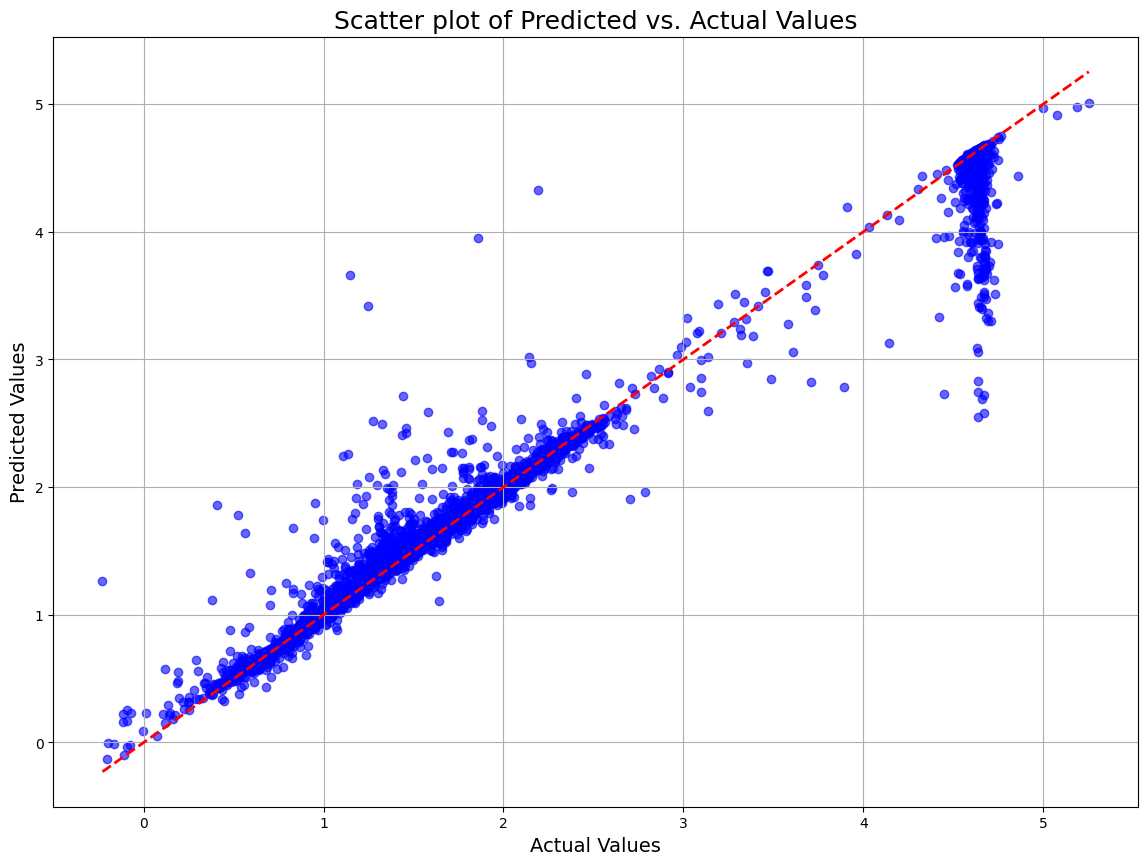

In [15]:
# Plot predicted vs actual with a line of slope 1
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red', linestyle='--', linewidth=2)  # Line with slope of 1
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Scatter plot of Predicted vs. Actual Values', fontsize=18)
plt.grid(True)
plt.show()

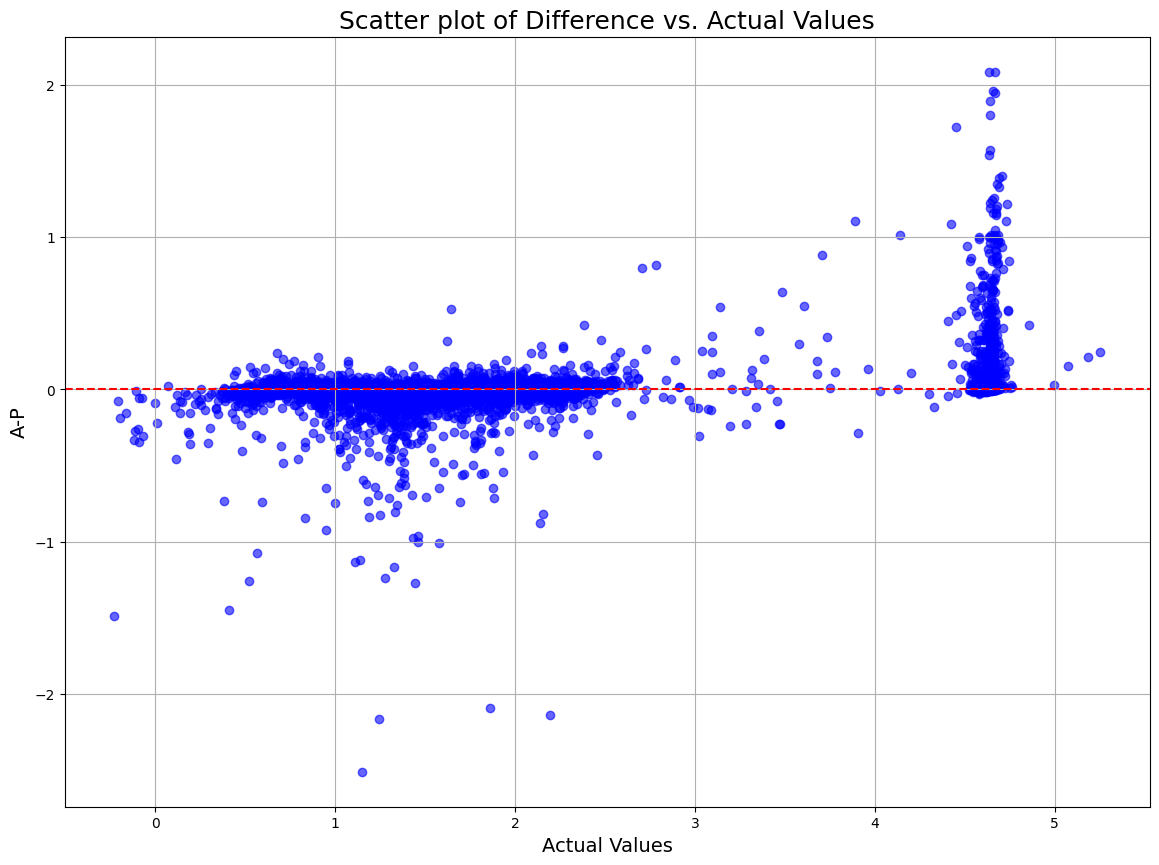

In [16]:
import matplotlib.pyplot as plt
# Plot actual vs. actual - predicted
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Difference'], color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('A-P', fontsize=14)
plt.title('Scatter plot of Difference vs. Actual Values', fontsize=18)
plt.grid(True)
plt.show()

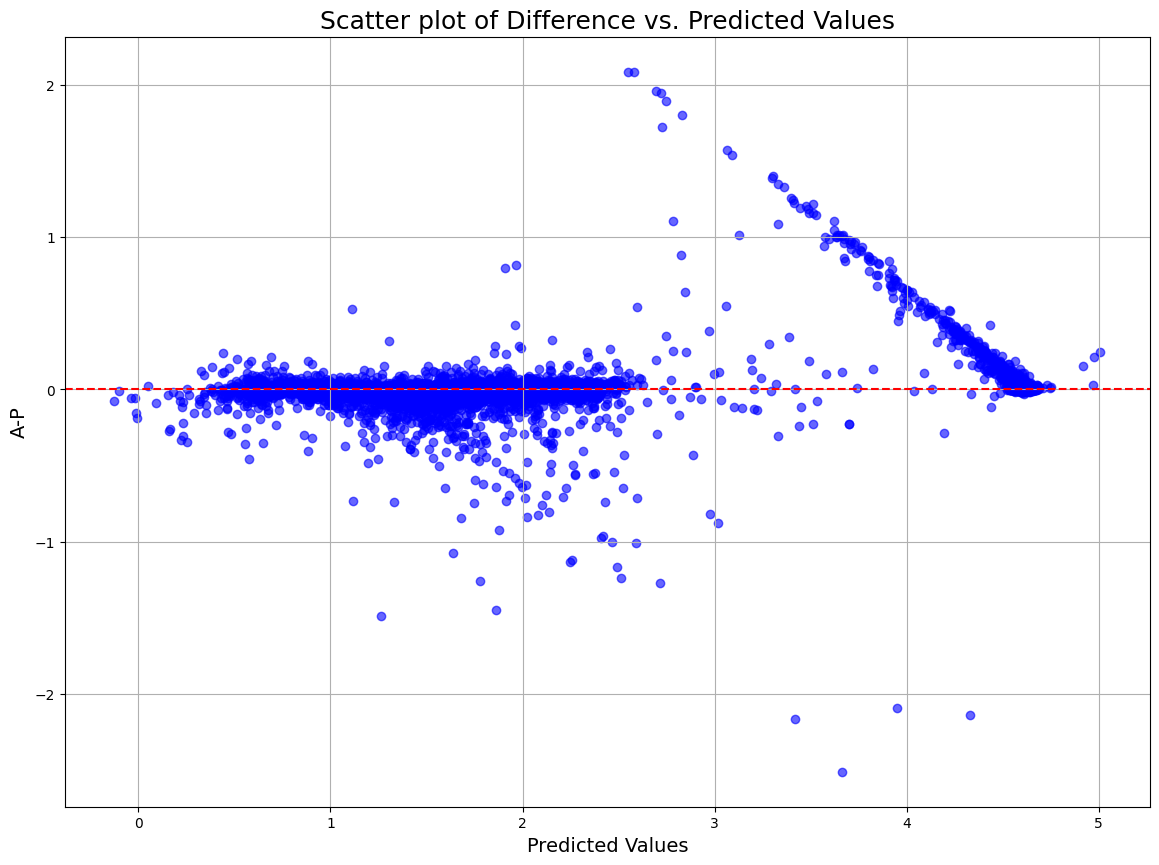

In [17]:
import matplotlib.pyplot as plt
# Plot actual vs. actual - predicted
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Predicted'], results_df['Difference'], color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('A-P', fontsize=14)
plt.title('Scatter plot of Difference vs. Predicted Values', fontsize=18)
plt.grid(True)
plt.show()

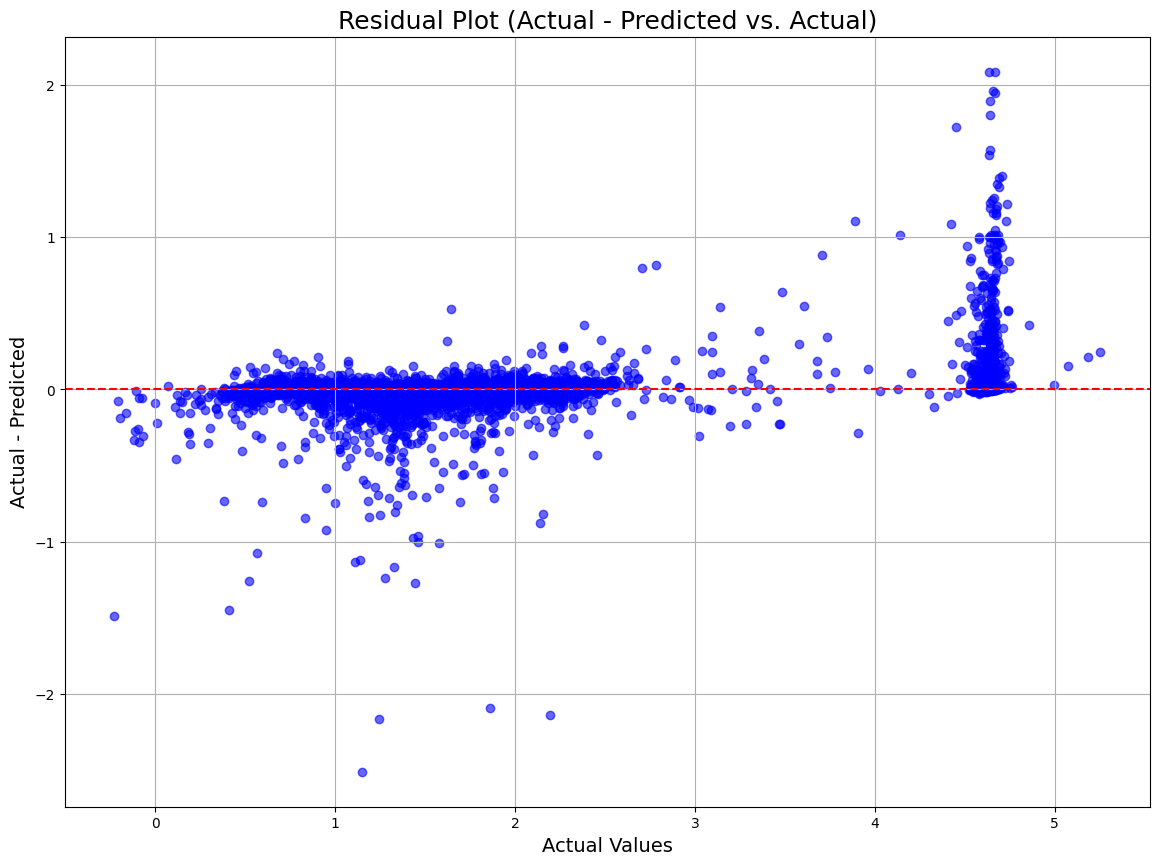

In [18]:
# Plot 1: Residual plot
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Difference'], color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot (Actual - Predicted vs. Actual)', fontsize=18)
plt.grid(True)
plt.show()

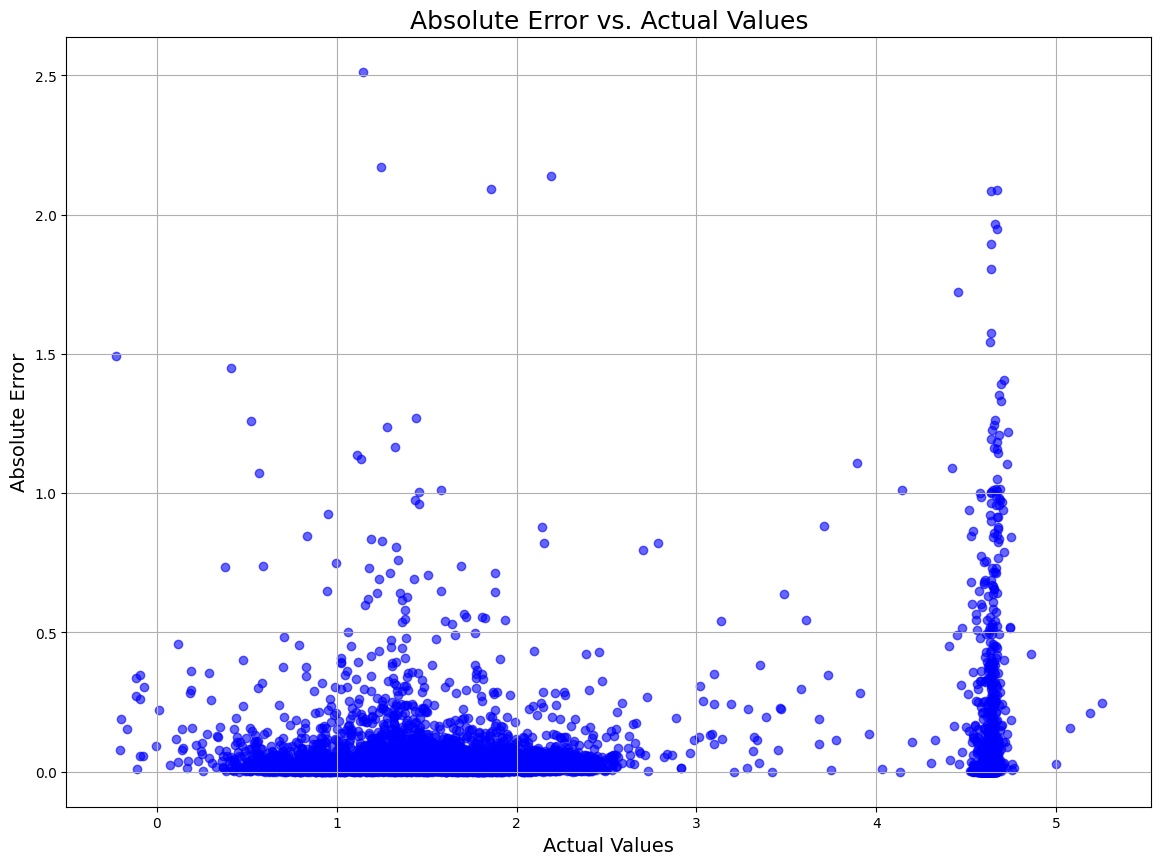

In [19]:
# Plot 2: Absolute Error plot
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Absolute Error'], color='blue', alpha=0.6)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Absolute Error', fontsize=14)
plt.title('Absolute Error vs. Actual Values', fontsize=18)
plt.grid(True)
plt.show()

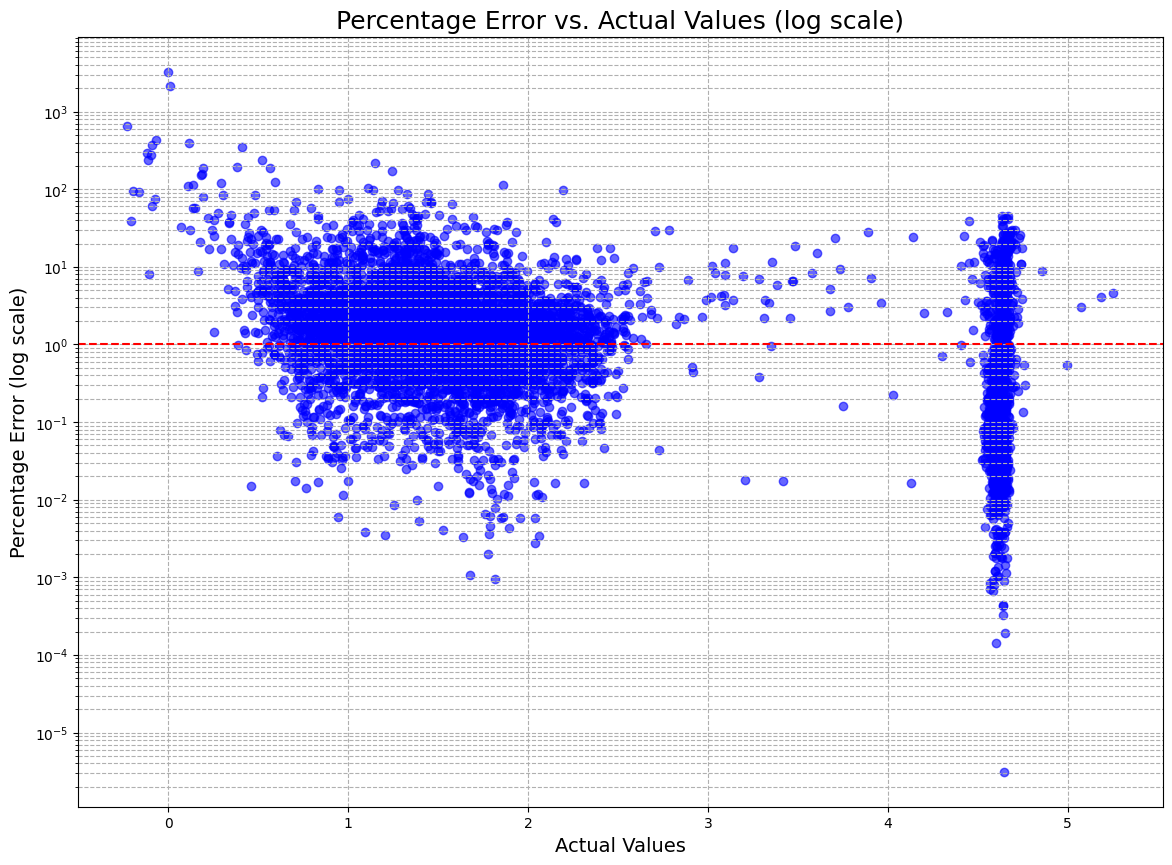

In [20]:
# Plot: Percentage Error plot on a log10 scale
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], np.abs(results_df['Percentage Error']), color='blue', alpha=0.6)
plt.yscale('log')
plt.axhline(1, color='red', linestyle='--')  # Add a horizontal line at y=1 for reference
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Percentage Error (log scale)', fontsize=14)
plt.title('Percentage Error vs. Actual Values (log scale)', fontsize=18)
plt.grid(True, which="both", ls="--")
plt.show()

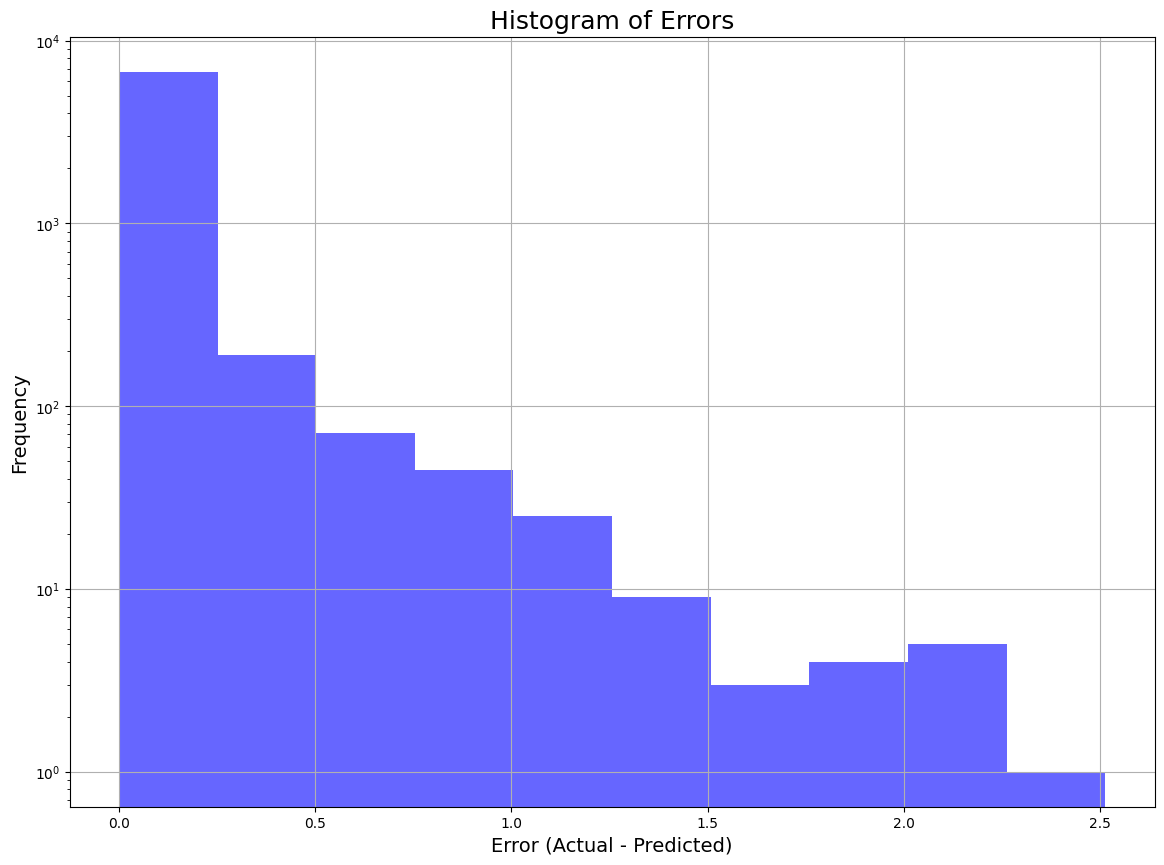

In [21]:
# Plot 4: Histogram of Errors
plt.figure(figsize=(14, 10))
plt.hist(results_df['Absolute Error'], bins=10, color='blue', alpha=0.6)
plt.xlabel('Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')
plt.title('Histogram of Errors', fontsize=18)
plt.grid(True)
plt.show()

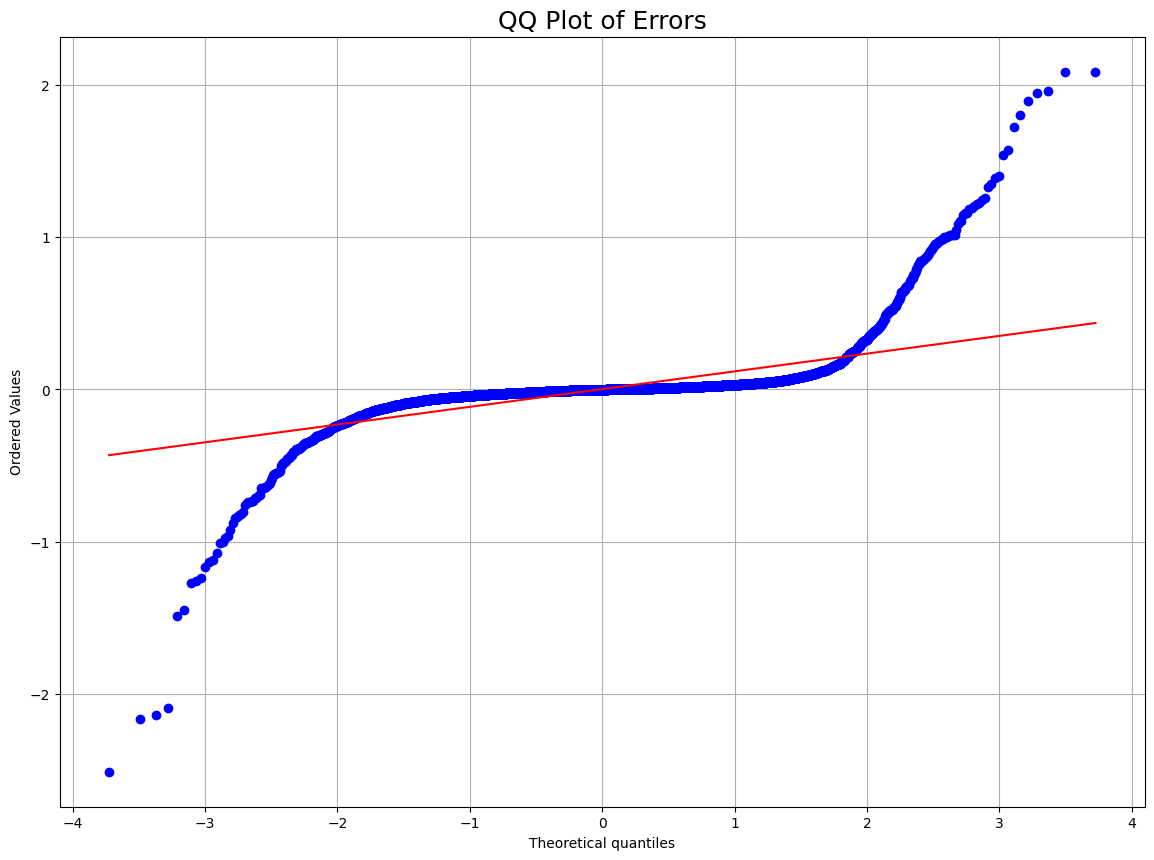

In [22]:
import scipy.stats as stats
plt.figure(figsize=(14, 10))
stats.probplot(results_df['Difference'], dist="norm", plot=plt)
plt.title('QQ Plot of Errors', fontsize=18)
plt.grid(True)
plt.show()

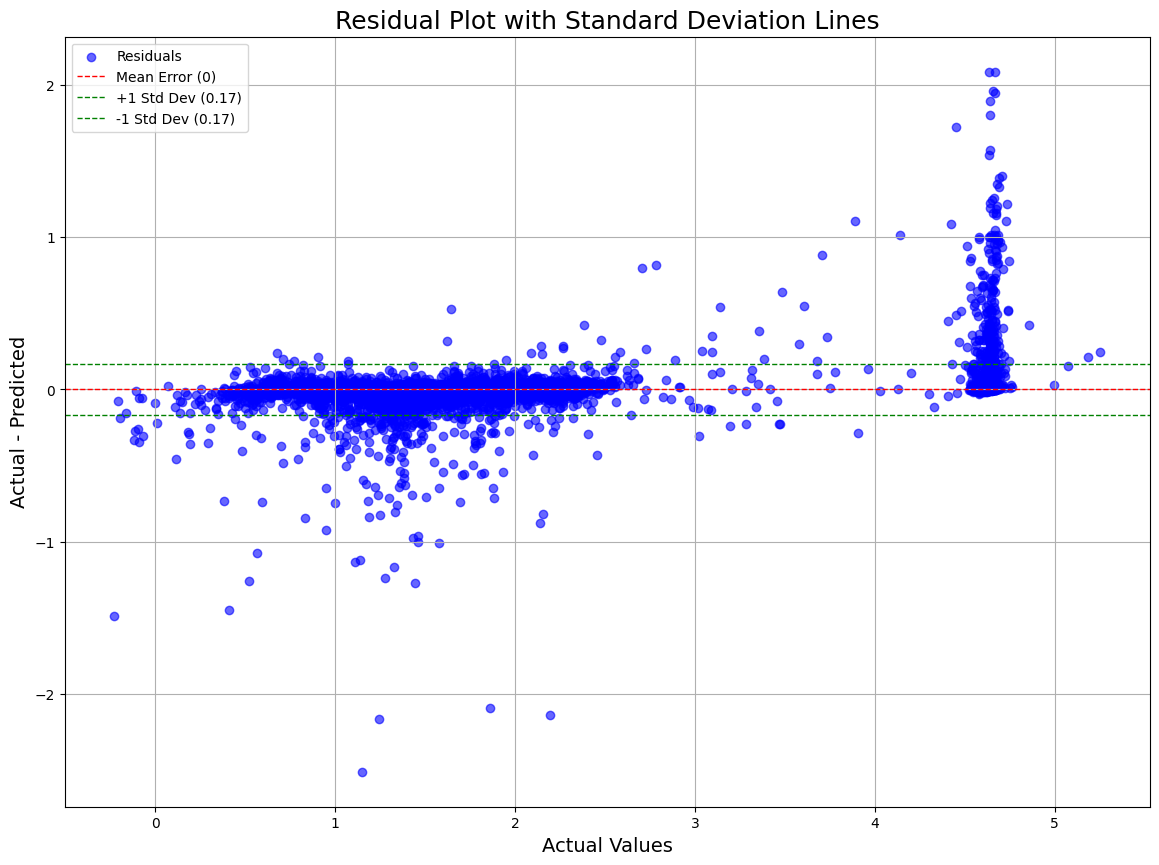

In [23]:
# Calculate the standard deviation of the residuals
std_dev = np.std(results_df['Difference'])

# Plot residuals with standard deviation lines
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Difference'], color='blue', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Mean Error (0)')
plt.axhline(std_dev, color='green', linestyle='--', linewidth=1, label=f'+1 Std Dev ({std_dev:.2f})')
plt.axhline(-std_dev, color='green', linestyle='--', linewidth=1, label=f'-1 Std Dev ({std_dev:.2f})')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot with Standard Deviation Lines', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

# Define the updated list of colors in RGB format
colors = [
    (180, 130, 207),
    (141, 70, 185),
    (122, 35, 171), #2
    (90, 22, 150), #2
    (70, 15, 135), 
    (0, 0, 100), #6 - 100

    (75, 120, 235),
    (71, 114, 232),#11
    (63, 94, 230), #10
    (55, 74, 228), #9
    (46, 63, 226), #8
    (10, 56, 223), #12 - 200
    


#     (120, 197, 238),
#     (112, 188, 241),
#     (105, 175, 241),
#     (100, 169, 239), 
#     (97, 160, 239),    
#     (88, 150, 237), 


 # 300 
    
    (126, 255, 40),    
    (20, 240, 30), 
    (30, 231, 67),  
    (42, 222, 82), 
    (64, 202, 94), 
    (57, 168, 87), # 400
    

    



    #(182, 255, 0), 
    #(219, 255, 0), 
    (245, 252, 0), 
    (240, 230, 2),
    (240, 222, 10), 
    (235, 200, 15),  
    (225, 188, 0),
    (205, 161, 0), #500
    
  
    (255, 176, 0), 
    (255, 165, 0),
    (255,130,0),
    (255, 100, 100), 
    (255, 50, 50), 
    (255, 0, 0) # 600
]
print(len(colors))
# Normalize the RGB values to [0, 1] range
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]

# Create a colormap object with the updated colors list
cmap = LinearSegmentedColormap.from_list("custom_gradient_with_brightened_color", colors, N=len(colors))

30


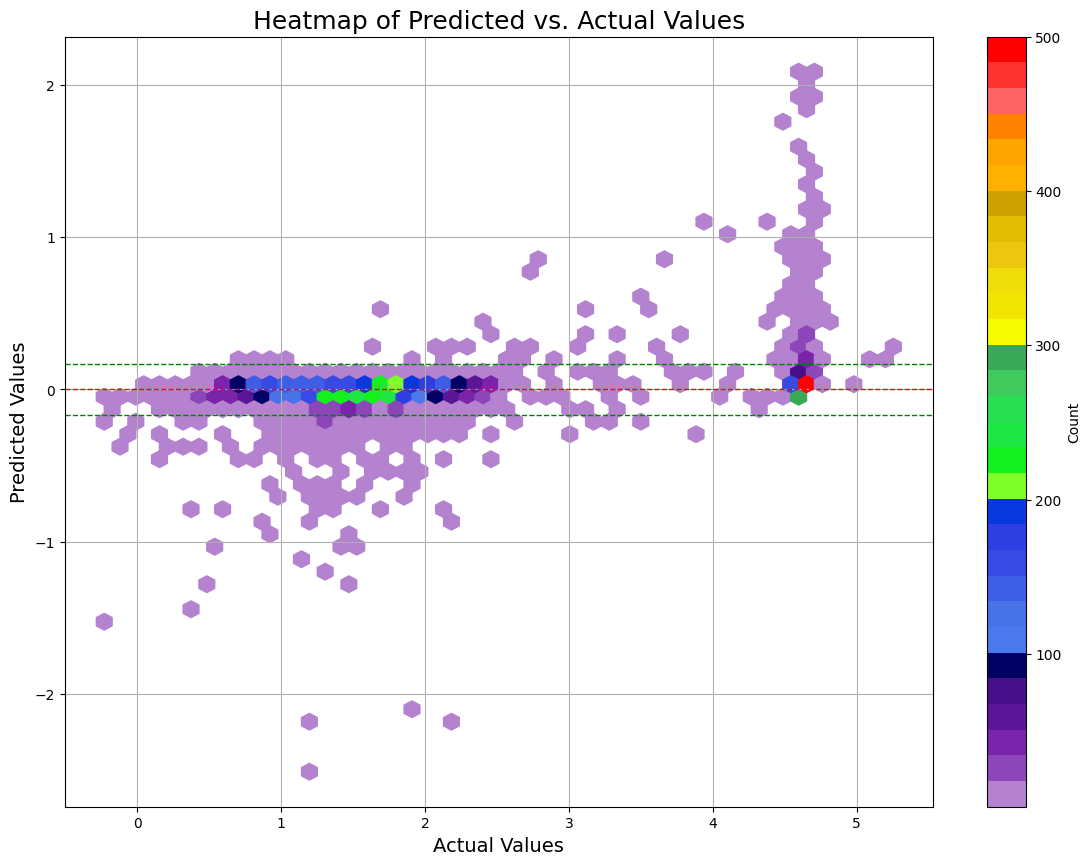

In [25]:
# Create a ListedColormap object
cmap = mcolors.ListedColormap(colors, name='my_rainbow')

cmap.set_under('white', alpha=0)  # Make values of zero transparent
cmap_args = dict(cmap=cmap, vmin=1,vmax=500)
plt.figure(figsize=(14, 10))
#plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', alpha=0.6)
plt.hexbin(results_df['Actual'], results_df['Difference'], gridsize=50, **cmap_args)  # Using cmap_args for colormap setup
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Mean Error (0)')
plt.axhline(std_dev, color='green', linestyle='--', linewidth=1, label=f'+1 Std Dev ({std_dev:.2f})')
plt.axhline(-std_dev, color='green', linestyle='--', linewidth=1, label=f'-1 Std Dev ({std_dev:.2f})')
# plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
#        [results_df['Actual'].min(), results_df['Actual'].max()],
#         color='red', linestyle='--', linewidth=0.5)  # Line with slope of 1
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Heatmap of Predicted vs. Actual Values', fontsize=18)
plt.colorbar(label='Count')
plt.grid(True)
plt.show()

Mean Difference: 0.1006435604504037
Standard Deviation of Difference: 0.25373583185259424
Sigma Significance: 0.39664701558143256
Mean Squared Error: 0.07447004323651629
R^2 Score: -25.183836075355117


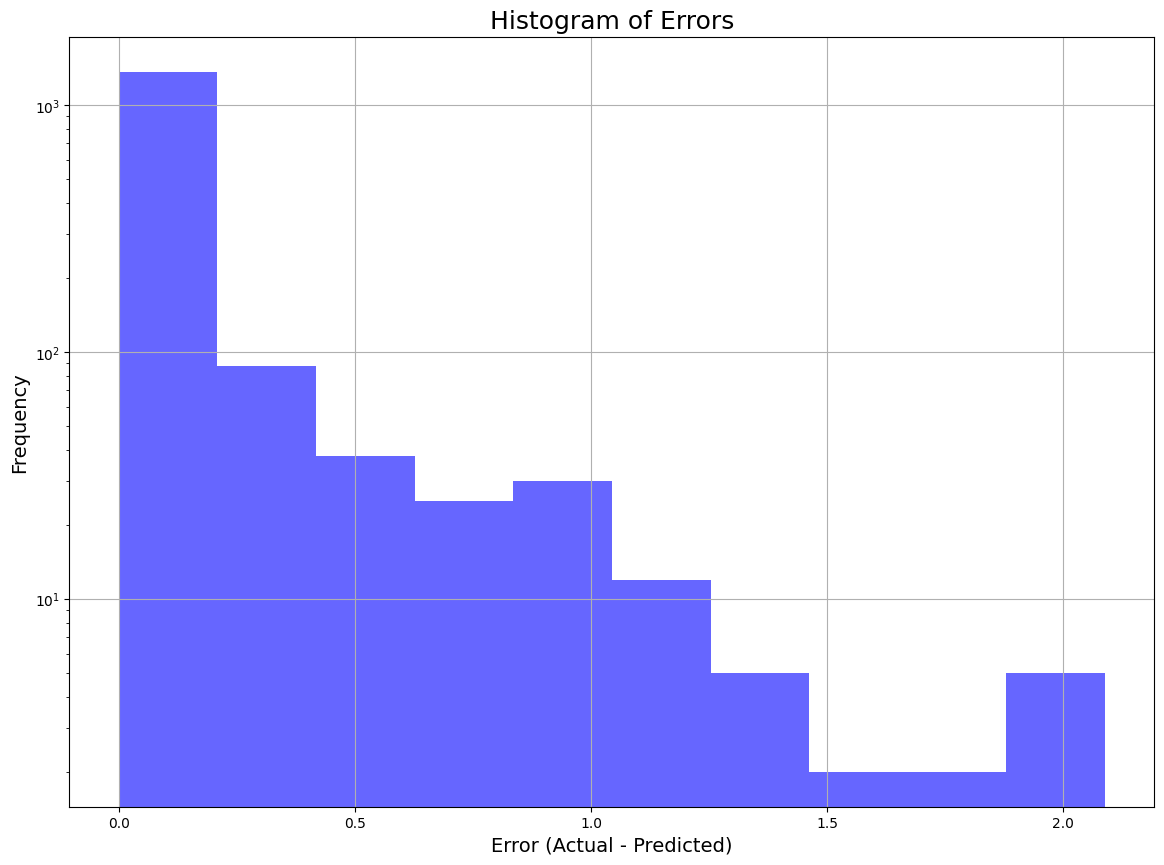

In [26]:
# Define the range of actual values for which you want to calculate sigma significance
min_actual_value = 4  # Replace with your minimum actual value
max_actual_value = results_df['Actual'].max()  # Replace with your maximum actual value

# Filter the results to include only the desired range of actual values
filteredResultsDF = results_df[(results_df['Actual'] >= min_actual_value) & (results_df['Actual'] <= max_actual_value)]

# Calculate the mean and standard deviation of the differences (residuals)
mean_difference = filteredResultsDF['Difference'].mean()
std_difference = filteredResultsDF['Difference'].std()

# Calculate sigma significance
sigma_significance = mean_difference / std_difference

print(f'Mean Difference: {mean_difference}')
print(f'Standard Deviation of Difference: {std_difference}')
print(f'Sigma Significance: {sigma_significance}')

mse = mean_squared_error(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])
r_squared = r2_score(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r_squared}')

plt.figure(figsize=(14, 10))
plt.hist(filteredResultsDF['Absolute Error'], bins=10, color='blue', alpha=0.6)
plt.xlabel('Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')
plt.title('Histogram of Errors', fontsize=18)
plt.grid(True)
plt.show()


Mean Difference: 0.0021127339584401062
Standard Deviation of Difference: 0.16978670279724326
Sigma Significance: 0.012443459491424965
Mean Squared Error: 0.028827929020228116
R^2 Score: 0.9846797562203148


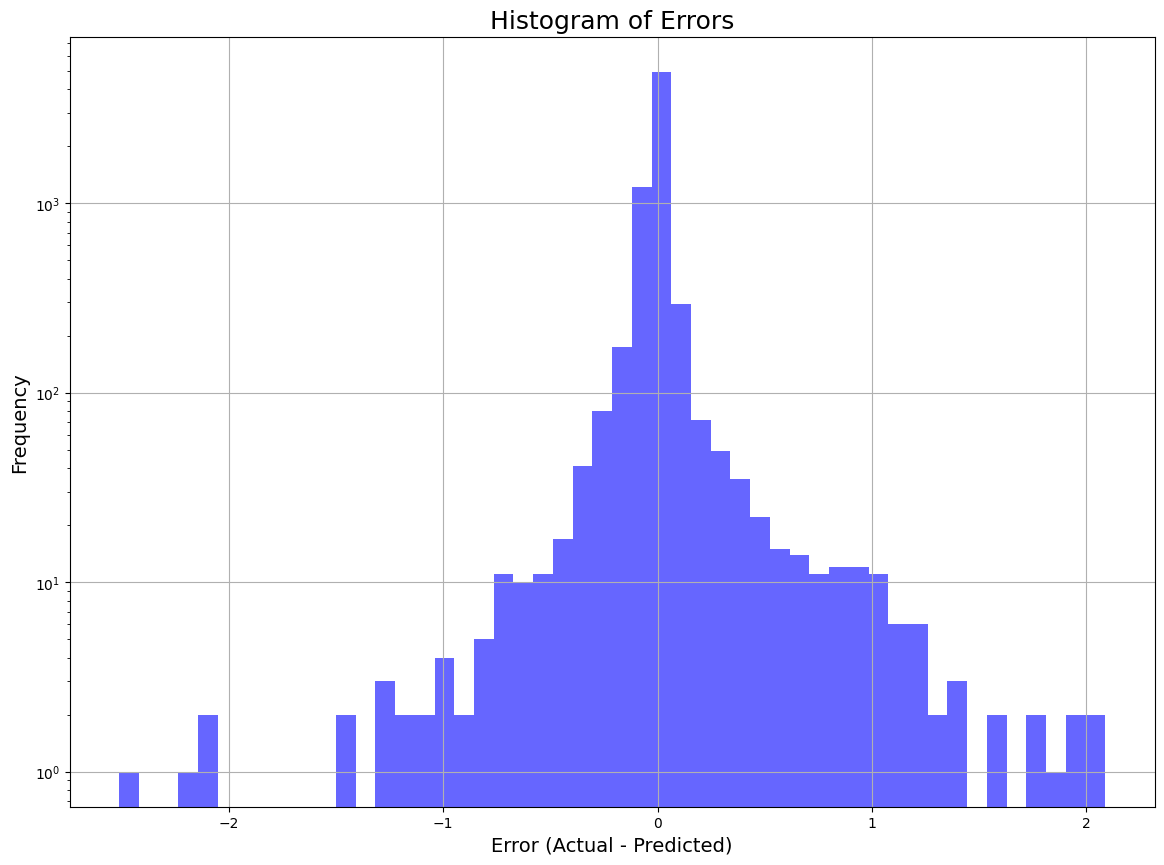

In [27]:



filteredResultsDF = results_df

# Calculate the mean and standard deviation of the differences (residuals)
mean_difference = filteredResultsDF['Difference'].mean()
std_difference = filteredResultsDF['Difference'].std()

# Calculate sigma significance
sigma_significance = mean_difference / std_difference

print(f'Mean Difference: {mean_difference}')
print(f'Standard Deviation of Difference: {std_difference}')
print(f'Sigma Significance: {sigma_significance}')

mse = mean_squared_error(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])
r_squared = r2_score(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r_squared}')
plt.figure(figsize=(14, 10))
plt.hist(filteredResultsDF['Difference'], bins=50, color='blue', alpha=0.6)
plt.xlabel('Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')
plt.title('Histogram of Errors', fontsize=18)
plt.grid(True)
plt.show()

In [28]:
# Define the range of actual values for which you want to calculate sigma significance
min_actual_value =results_df['Actual'].min() # Replace with your minimum actual value
max_actual_value = results_df['Actual'].max() # Replace with your maximum actual value

# Filter the results to include only the desired range of actual values
filteredResultsDF = results_df[(results_df['Actual'] >= min_actual_value) & (results_df['Actual'] <= max_actual_value)]

# Calculate the mean and standard deviation of the differences (residuals)
mean_difference = filteredResultsDF['Difference'].mean()
std_difference = filteredResultsDF['Difference'].std()

# Calculate sigma significance
sigma_significance = mean_difference / std_difference

print(f'Mean Difference: {mean_difference}')
print(f'Standard Deviation of Difference: {std_difference}')
print(f'Sigma Significance: {sigma_significance}')

mse = mean_squared_error(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])
r_squared = r2_score(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r_squared}')


Mean Difference: 0.0021127339584401062
Standard Deviation of Difference: 0.16978670279724326
Sigma Significance: 0.012443459491424965
Mean Squared Error: 0.028827929020228116
R^2 Score: 0.9846797562203148


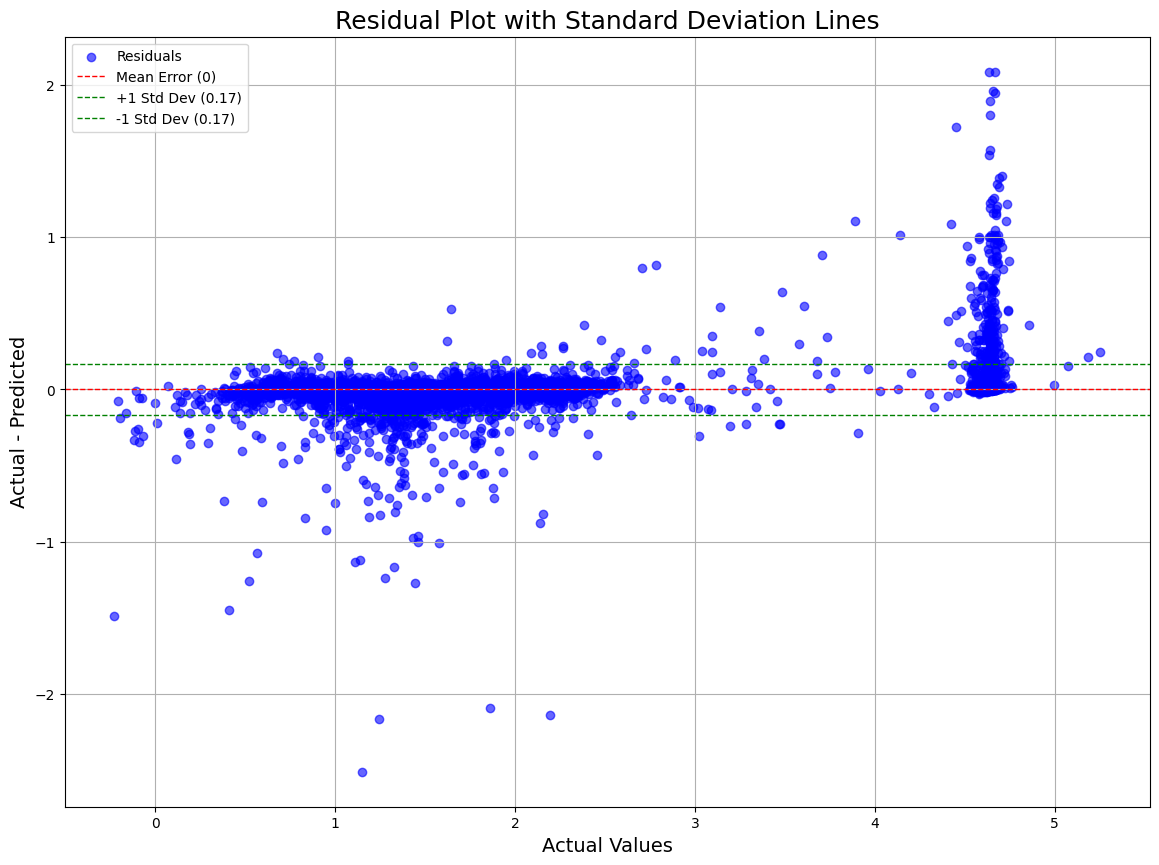

In [29]:
# Calculate the standard deviation of the residuals
std_dev = np.std(results_df['Difference'])

# Plot residuals with standard deviation lines
plt.figure(figsize=(14, 10))
plt.scatter(filteredResultsDF['Actual'], filteredResultsDF['Difference'], color='blue', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Mean Error (0)')
plt.axhline(std_dev, color='green', linestyle='--', linewidth=1, label=f'+1 Std Dev ({std_dev:.2f})')
plt.axhline(-std_dev, color='green', linestyle='--', linewidth=1, label=f'-1 Std Dev ({std_dev:.2f})')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot with Standard Deviation Lines', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

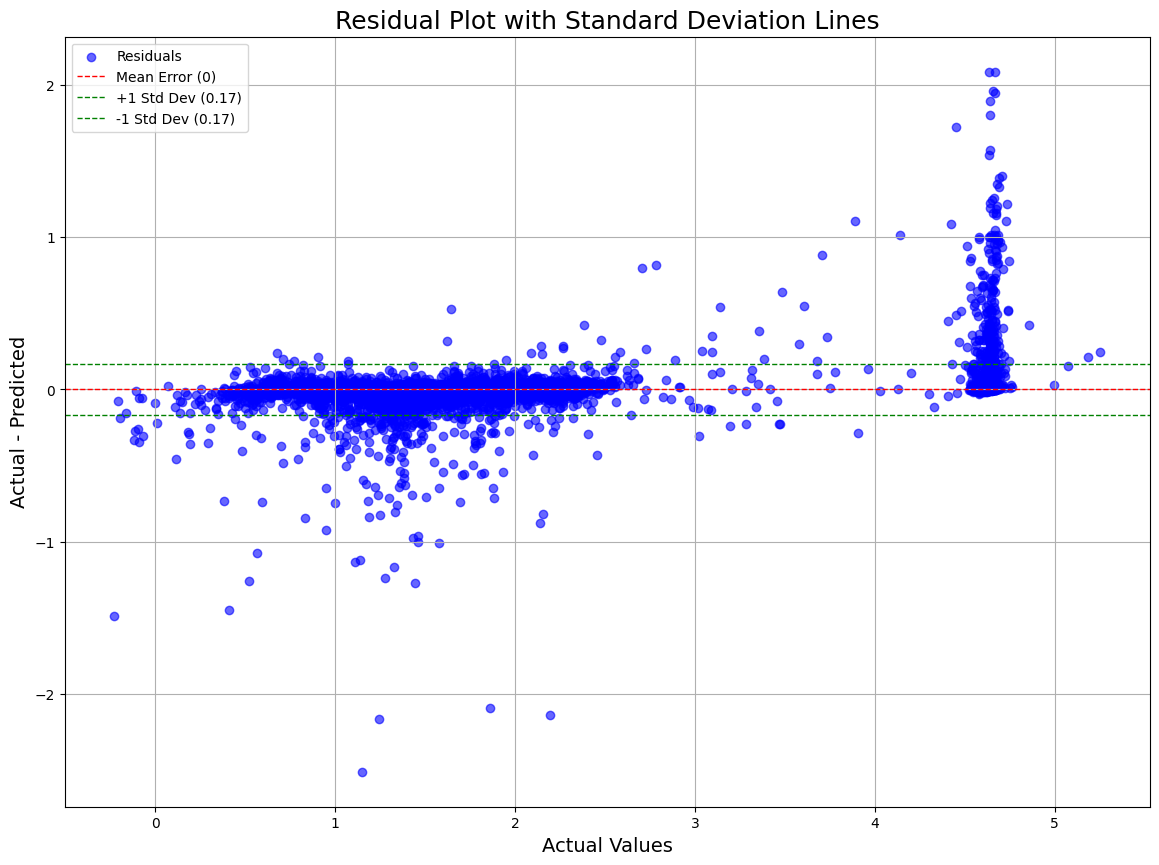

In [30]:

std_dev = np.std(results_df['Difference'])

# Plot residuals with standard deviation lines
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Difference'], color='blue', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Mean Error (0)')
plt.axhline(std_dev, color='green', linestyle='--', linewidth=1, label=f'+1 Std Dev ({std_dev:.2f})')
plt.axhline(-std_dev, color='green', linestyle='--', linewidth=1, label=f'-1 Std Dev ({std_dev:.2f})')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot with Standard Deviation Lines', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()